In [195]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Data 

In [196]:
file_path=os.path.join(os.getcwd(),"dataset","train.csv")

df = pd.read_csv(file_path)

In [197]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


### Overview

Duplicate Removal 

In [198]:
def remove_duplicates(df):
    """
    Remove duplicates from a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame with duplicates removed
    """
    # Print the shape before removing duplicates
    print("Shape before removing duplicates:", df.shape)

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    # Print the shape after removing duplicates
    print("Shape after removing duplicates:", df_no_duplicates.shape)

    return df_no_duplicates


df=remove_duplicates(df=df)

Shape before removing duplicates: (6500, 20)
Shape after removing duplicates: (6500, 20)


Data Shape

Columns

In [199]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

Columns Lables

In [200]:
# Replace spaces with underscores in column labels
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [201]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

Customer Details

In [202]:
df[["Customer_Id",'Customer_Location','Customer_Information']]

,Customer_Id,Customer_Location,Customer_Information
0,fffe3900350033003300,"New Michelle, OH 50777",Working Class
1,fffe3800330031003900,"New Michaelport, WY 12072",Working Class
2,fffe3600370035003100,"Bowmanshire, WA 19241",Working Class
3,fffe350031003300,"East Robyn, KY 86375",Wealthy
4,fffe3900320038003400,"Aprilside, PA 52793",Working Class
...,...,...,...
6495,fffe3800370037003300,"New Robert, VT 85335",Wealthy
6496,fffe310036003400,"New Joshua, VA 35766",Working Class
6497,fffe3600300031003300,"Lake Kelly, MA 80823",Wealthy
6498,fffe3600350035003900,"Hintonberg, UT 35006",Working Class


Artist Details

In [203]:
df[['Artist_Name', 'Artist_Reputation']]

,Artist_Name,Artist_Reputation
0,Billy Jenkins,0.26
1,Jean Bryant,0.28
2,Laura Miller,0.07
3,Robert Chaires,0.12
4,Rosalyn Krol,0.15
...,...,...
6495,Jeffrey Freudenthal,0.37
6496,Larry Edwards,0.67
6497,Denise Worth,0.68
6498,Daniel Drew,0.02


Sculpture Details

In [204]:
df[['Height', 'Width','Weight', 'Material','Price_Of_Sculpture']]

,Height,Width,Weight,Material,Price_Of_Sculpture
0,17.0,6.0,4128.0,Brass,13.91
1,3.0,3.0,61.0,Brass,6.83
2,8.0,5.0,237.0,Clay,4.96
3,9.0,NaN,NaN,Aluminium,5.81
4,17.0,6.0,324.0,Aluminium,3.18
...,...,...,...,...,...
6495,37.0,10.0,16551.0,Brass,28.28
6496,15.0,NaN,18981.0,NaN,67.18
6497,19.0,8.0,587.0,Clay,6.92
6498,33.0,9.0,1269377.0,Stone,2929.13


Shipment Details

In [205]:
df[['Base_Shipping_Price','International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile',]]

,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile
0,16.27,Yes,Yes,No,Airways,No
1,15.00,No,No,No,Roadways,No
2,21.18,No,No,No,Roadways,Yes
3,16.31,No,No,No,NaN,No
4,11.94,Yes,Yes,Yes,Airways,No
...,...,...,...,...,...,...
6495,38.46,Yes,Yes,No,Airways,No
6496,27.72,No,No,No,Roadways,No
6497,10.38,Yes,No,No,NaN,Yes
6498,69.76,No,Yes,No,Roadways,No


NAN Values

Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%
Material: 11.75%
Transport: 21.42%
Remote_Location: 11.86%


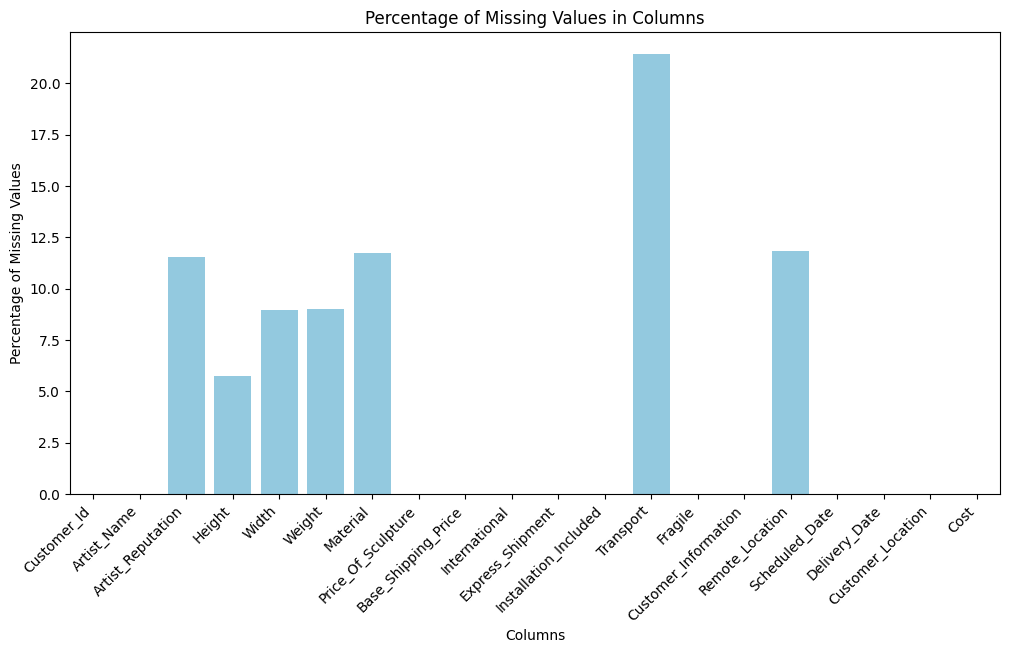

In [206]:
def plot_missing_values(df):
    """
    Plot missing values in the columns of a DataFrame and print columns with their percentage of missing values.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Print columns with their percentage of missing values
    print("Columns with Percentage of Missing Values:")
    for col, percentage in missing_percentage.items():
        if percentage != 0 :
            print(f"{col}: {percentage:.2f}%")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
plot_missing_values(df=df)

Dropping Irrelevant columns 

In [207]:

df=df.drop(columns=["Artist_Name","Customer_Id"])


In [208]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=df)

### Numerical Data

In [209]:
numerical_labels

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [210]:
df[numerical_labels]

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,-283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,-159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,-154.29
3,0.12,9.0,NaN,NaN,5.81,16.31,-161.16
4,0.15,17.0,6.0,324.0,3.18,11.94,-159.23
...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,28.28,38.46,872.43
6496,0.67,15.0,NaN,18981.0,67.18,27.72,1347.02
6497,0.68,19.0,8.0,587.0,6.92,10.38,354.55
6498,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.50


Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%


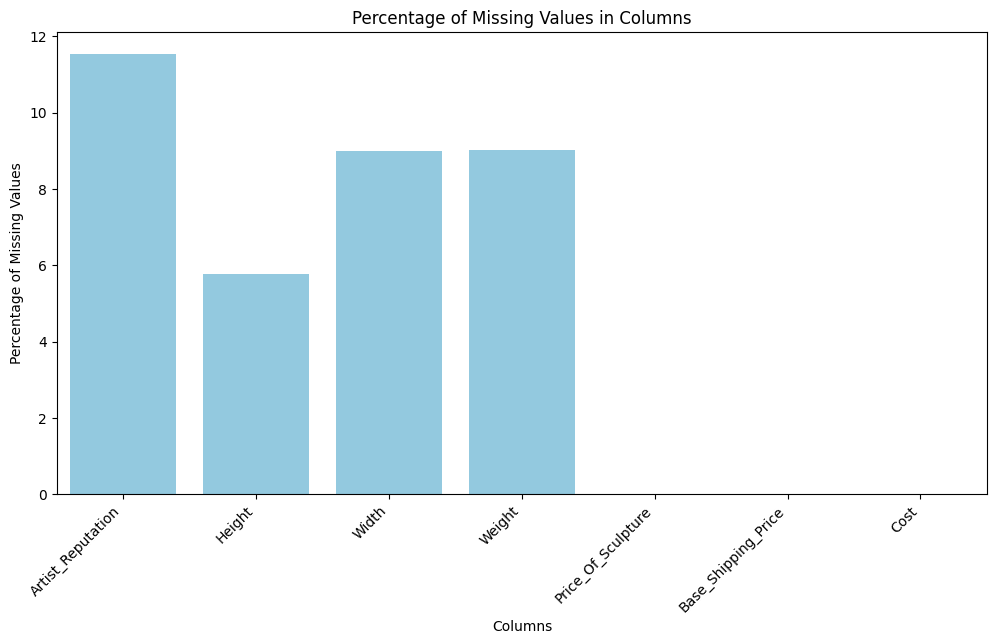

In [211]:
plot_missing_values(df=df[numerical_labels])

Histplot

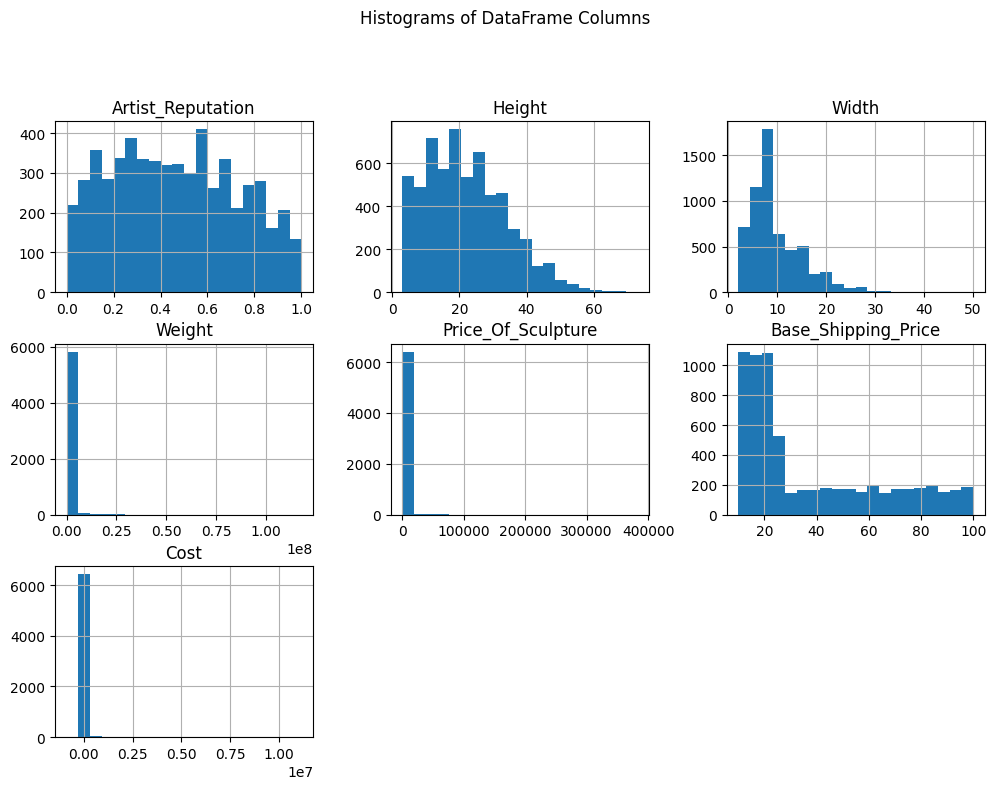

In [212]:
def plot_histograms(df):
    """
    Plot histograms for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Use the hist method to plot histograms for all columns
    df.hist(figsize=(12, 8), bins=20)
    
    # Set plot labels and title
    plt.suptitle("Histograms of DataFrame Columns", y=1.02)
    plt.show()
    
    
plot_histograms(df=df[numerical_labels])

Artist Reputation

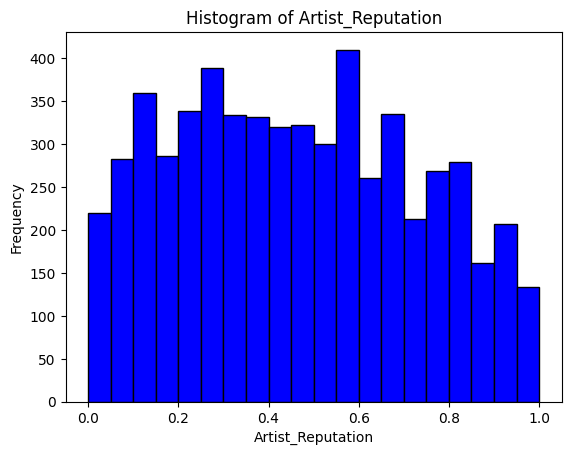

In [213]:
def plot_histogram(data_frame, column_label):
    """
    Plot a histogram for a specified column in a DataFrame.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column for which to plot the histogram
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return

    # Plot histogram
    plt.hist(data_frame[column_label], bins=20, color='blue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel(column_label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_label}')
    
    # Show the plot
    plt.show()
plot_histogram(data_frame=df, column_label="Artist_Reputation")

In [214]:
def create_reputation_category_column(data_frame, column_label, bin_edges, bin_labels):
    """
    Replace the existing column with corresponding categories based on binning for artist reputation.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column to replace with categorical values
    - bin_edges: List, the edges of the bins for binning the reputation values
    - bin_labels: List, the labels for the reputation categories

    Returns:
    - data_frame: Updated DataFrame with the existing column replaced by categorical values
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Replace the existing column with corresponding categories based on binning
    data_frame[column_label] = pd.cut(data_frame[column_label], bins=bin_edges, labels=bin_labels, include_lowest=True)

    return data_frame


This code organizes an artist's reputation into categories with different levels, including 'Low_Reputation,' 'Moderate_Reputation,' 'High_Reputation,' and 'Very_High_Reputation.'

 It sets up these levels based on specified boundaries (bin edges) and then uses a function to create a new column in a table of data (DataFrame) for the artists, categorizing them according to their reputation levels.

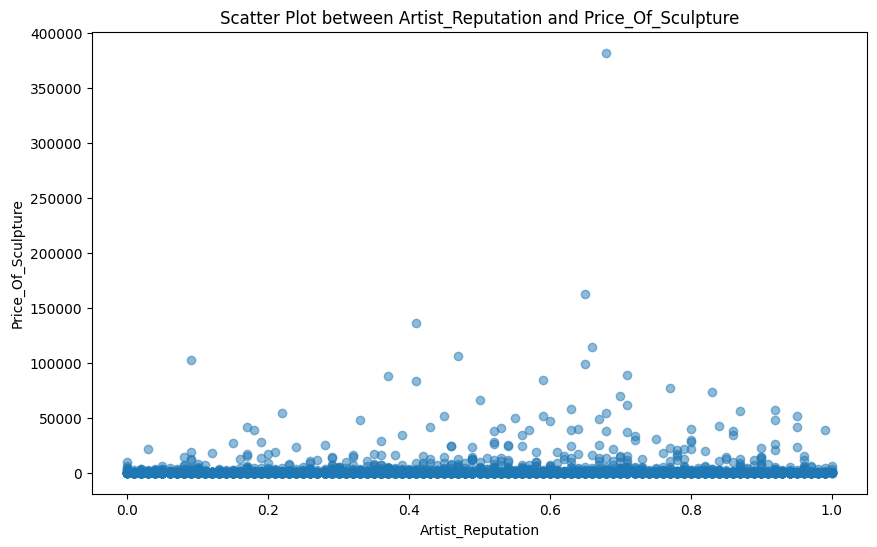

In [215]:
def scatter_plot(df, x_column, y_column):
    """
    Create a scatter plot between two numerical columns.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - x_column: str
        The name of the x-axis (horizontal) numerical column.
    - y_column: str
        The name of the y-axis (vertical) numerical column.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    
    plt.title(f'Scatter Plot between {x_column} and {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    plt.show()
scatter_plot(df, x_column='Artist_Reputation', y_column='Price_Of_Sculpture')

In [216]:
# Define bin edges and labels
reputation_bin_edges = [0, 0.3,0.65,1.0]
reputation_bin_labels = ['Low_Reputation', 'Moderate_Reputation', 'High_Reputation']
# Use the function to add a new categorical column
df = create_reputation_category_column(df, 'Artist_Reputation', reputation_bin_edges, reputation_bin_labels)

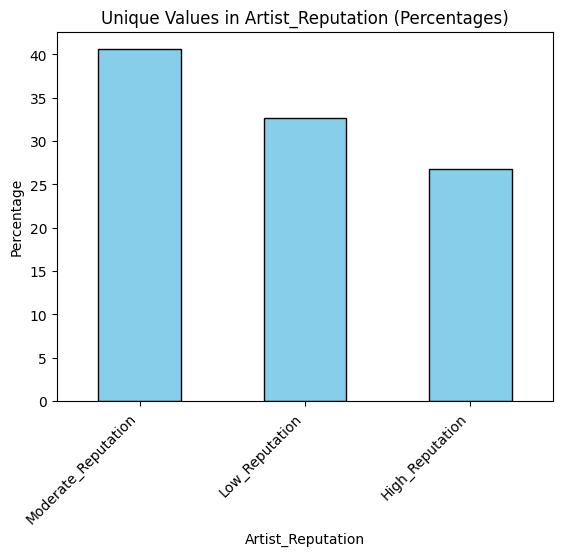

In [217]:
def plot_categorical_unique_values(df, column_label):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column
    value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    
    
plot_categorical_unique_values(df, column_label='Artist_Reputation')

In [218]:
numerical_labels,categorical_lables=split_numerical_categorical_labels(df=df)

In [219]:
import numpy as np

Replacing Nan values in the Artist Reputation with random Categorical Bins created from Numerical data

In [220]:

def replace_nan_with_random_categories(data_frame, column_label):
    """
    Replace NaN values in a specified categorical column with random categories.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the categorical column to replace NaN values

    Returns:
    - data_frame: Updated DataFrame with NaN values replaced by random categories
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Get the list of unique categories in the column
    categories = data_frame[column_label].dropna().unique()

    # Replace NaN values with random categories
    random_categories = np.random.choice(categories, size=data_frame[column_label].isnull().sum())
    data_frame.loc[data_frame[column_label].isnull(), column_label] = random_categories

    return data_frame

df=replace_nan_with_random_categories(data_frame=df, column_label="Artist_Reputation")

In [221]:
df=df.dropna(subset=['Material'])

Weight | Height | Width 

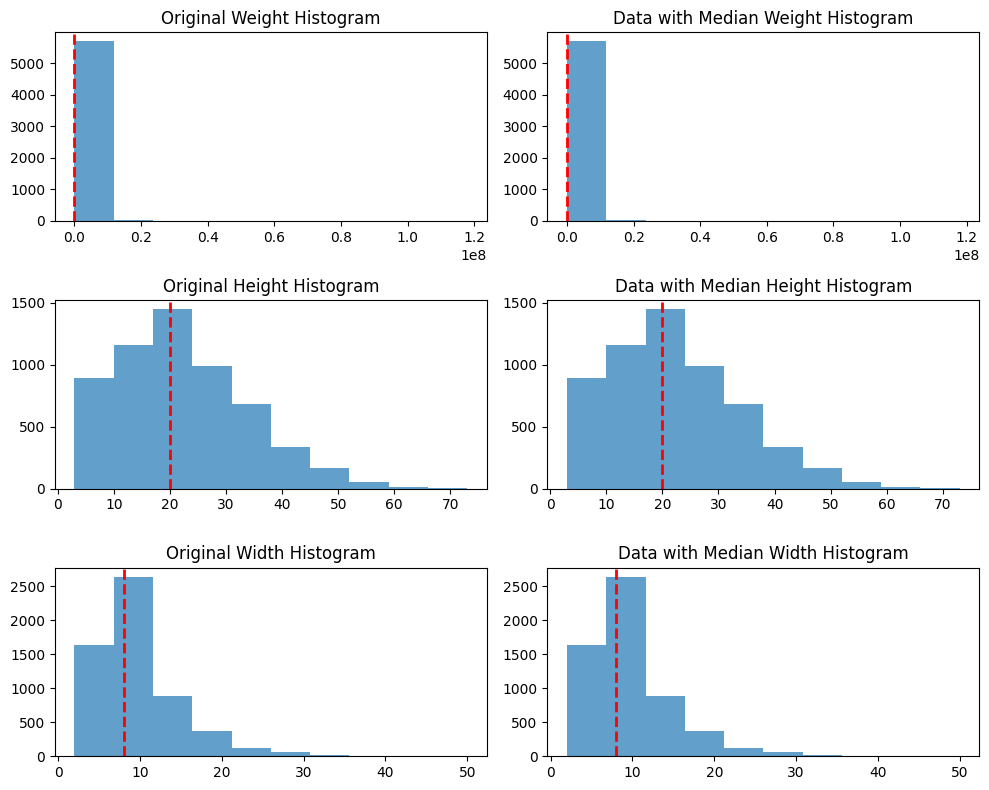

In [222]:
def median_by_material(dataframe, material_column, columns_to_median):
    """
    Calculate the median of values in specified 'columns_to_median' for each category in 'Material' column,
    excluding rows with NaN values in the specified columns. Also, replace NaN values in the specified columns
    with the corresponding median values.

    Parameters:
    - dataframe: pandas DataFrame
    - material_column: str, name of the categorical column 'Material'
    - columns_to_median: list of str, names of the columns to calculate median

    Returns:
    - df_with_median: pandas DataFrame with NaN values replaced by the median values
    """
    
    dataframe_1=dataframe.dropna(subset=[material_column])
    # Drop rows with NaN values in the specified columns
    df_without_nan = dataframe_1.dropna(subset=columns_to_median + [material_column])

    # Group by 'Material' and calculate the median of specified columns for each category
    median_by_material = df_without_nan.groupby(material_column)[columns_to_median].median()

    # Replace NaN values in the specified columns with corresponding median values
    for col in columns_to_median:
        dataframe[col] = dataframe.apply(
            lambda row: median_by_material.loc[row[material_column], col] if pd.isna(row[col]) else row[col],
            axis=1
        )

    # Plotting
    fig, axes = plt.subplots(len(columns_to_median), 2, figsize=(10, 8))

    for i, col in enumerate(columns_to_median):
        # Plot original data histogram with median line
        axes[i, 0].hist(dataframe[col], bins=10, alpha=0.7)
        axes[i, 0].axvline(dataframe[col].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
        axes[i, 0].set_title(f'Original {col} Histogram')

        # Plot data with median histogram with median line
        axes[i, 1].hist(dataframe[col], bins=10, alpha=0.7)
        axes[i, 1].axvline(dataframe[col].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
        axes[i, 1].set_title(f'Data with Median {col} Histogram')

    plt.tight_layout()
    plt.show()

    return dataframe

df=median_by_material(dataframe=df, material_column="Material", columns_to_median=["Weight","Height","Width"])

After replacing NaN values with the median, there is no significant change in median values.

This code fills in missing values in the "Weight," "Height," and "Width" columns of a DataFrame (df).

It employs the apply method to iterate through each row.

If the "Weight" is missing (NaN), it replaces it with a median weight based on the item's material. If the "Weight" is already present, it remains unchanged. The objective is to ensure all items have a weight, utilizing material-specific averages for missing values.

Similar filling of NaN values is carried out for the Height and Width columns.

Columns with Percentage of Missing Values:


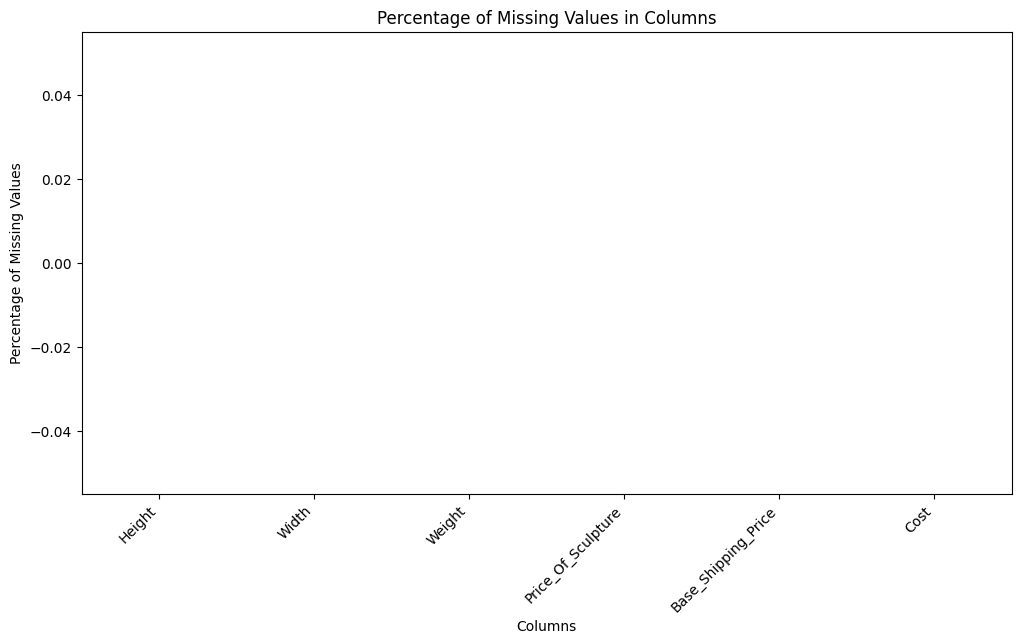

In [223]:
plot_missing_values(df=df[numerical_labels])

### Categorical Data 

In [224]:
def stacked_bar_plot(df, column1, column2, normalize=True, cmap='husl', show_percentages=True):
    """
    Create a stacked bar plot for the cross-tabulation of two categorical variables.

    Parameters:
    - df: pandas DataFrame
    - column1: Label of the first categorical column
    - column2: Label of the second categorical column
    - normalize: Whether to normalize the values (default is True)
    - cmap: Colormap for the plot (default is 'husl')
    - show_percentages: Whether to display percentages on the plot (default is True)

    Returns:
    - None (displays the plot)
    """

    # Create cross-tabulation
    if normalize:
        cross_tab = pd.crosstab(df[column1], df[column2], normalize='all') * 100
    else:
        cross_tab = pd.crosstab(df[column1], df[column2])

    # Plotting
    fig, ax = plt.subplots(figsize=(16, 10))  # Adjust the size as needed
    cross_tab.plot.bar(stacked=True, cmap=cmap, ax=ax)

    # Set plot labels and title
    plt.title(f'Stacked Bar Plot: {column1} vs. {column2} {"(Percentage)" if normalize else ""}')
    plt.xlabel(column1)
    plt.ylabel('Percentage' if normalize and show_percentages else 'Count')

    # Optionally, you can rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    # Display percentages on the plot
    if show_percentages:
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    # Adjust layout to prevent clipping of labels
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()


In [225]:
categorical_labels

['Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

In [226]:
df['Remote_Location'] = df['Remote_Location'].replace({'Yes': 'remote', 'No': 'urban'})

Columns with Percentage of Missing Values:
Transport: 19.84%
Remote_Location: 11.09%


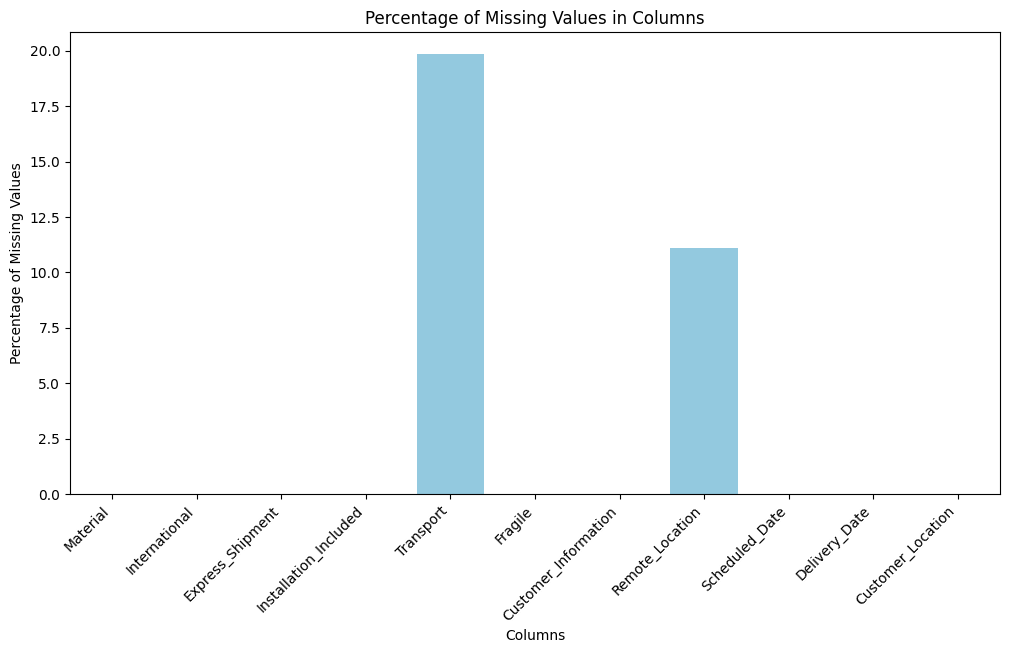

In [227]:
plot_missing_values(df=df[categorical_labels])

Dropping rows which no data of material

In [228]:
# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

Material

In [229]:
df['Material'].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone'],
      dtype=object)

Fragile 

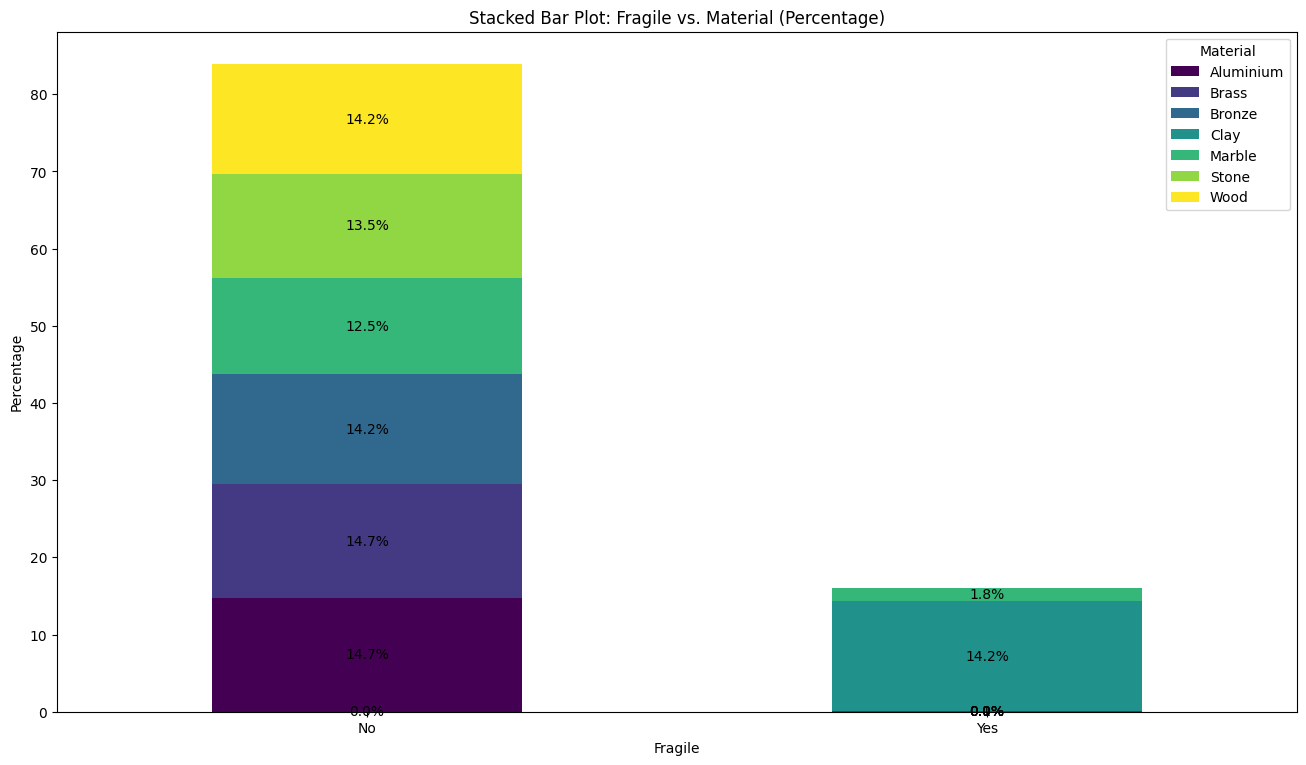

In [230]:
stacked_bar_plot(df, column1='Fragile', column2='Material', normalize=True, cmap='viridis', show_percentages=True)

Fragile Materials
- Clay 
- Marble

In [231]:
def plot_categorical_numerical_relationship(df, categorical_column, numerical_column):
    """
    Plot the relationship between a categorical column and a numerical column.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))

    # Box plot
    sns.boxplot(x=categorical_column, y=numerical_column, data=df)
    
    plt.title(f'Relationship Between {categorical_column} and {numerical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)

    plt.show()


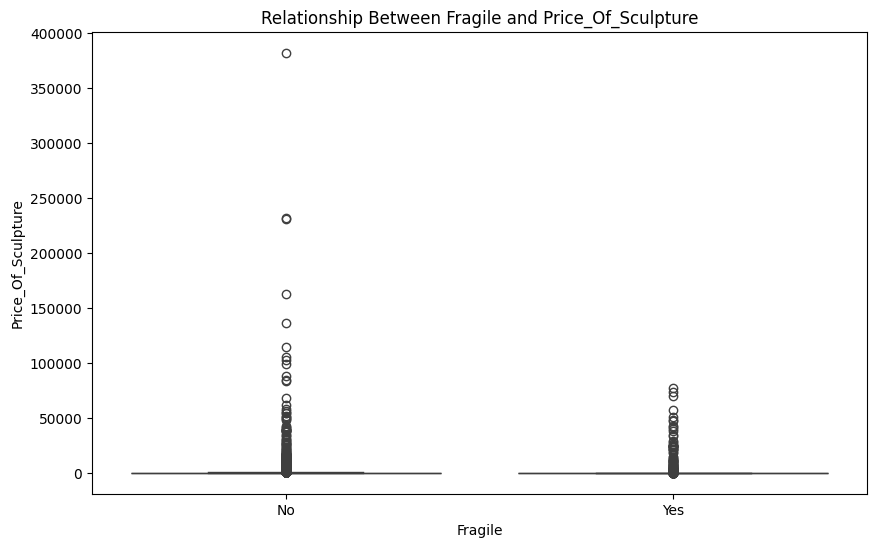

In [232]:
plot_categorical_numerical_relationship(df=df,categorical_column='Fragile',numerical_column='Price_Of_Sculpture')

Price of scultures with very high value is  because of the large wieght of the matericals in these case stone 

- hence the in data products which are not Fragile can be seen with very high Price which is predominantly because of the weight of the material used

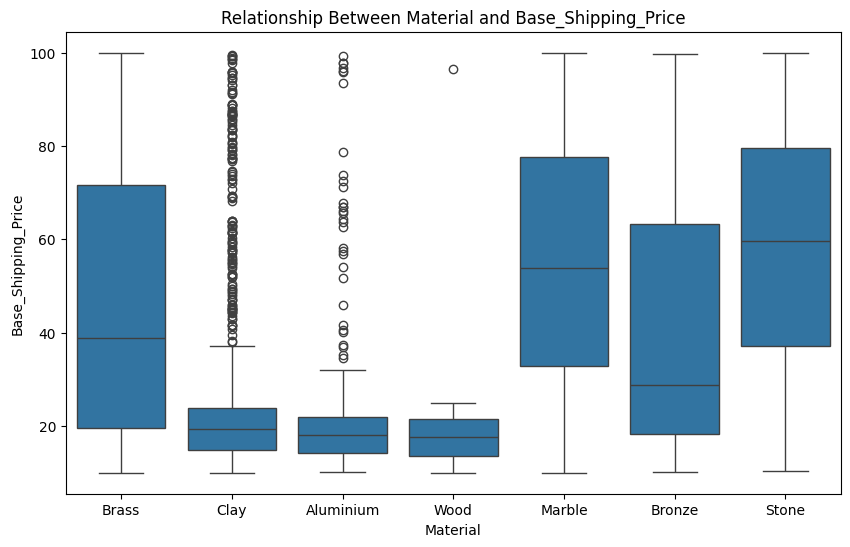

In [233]:

plot_categorical_numerical_relationship(df, categorical_column='Material', numerical_column='Base_Shipping_Price')

- Wood 

        Wood required most less Base shipping Price 

- Clay and Aluminium 

        Clay and Aluminium has the most Diveresd Packing Price may be due to Fragile Scluptures and Packaging Expenses 

In [234]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Scheduled_Date',
       'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

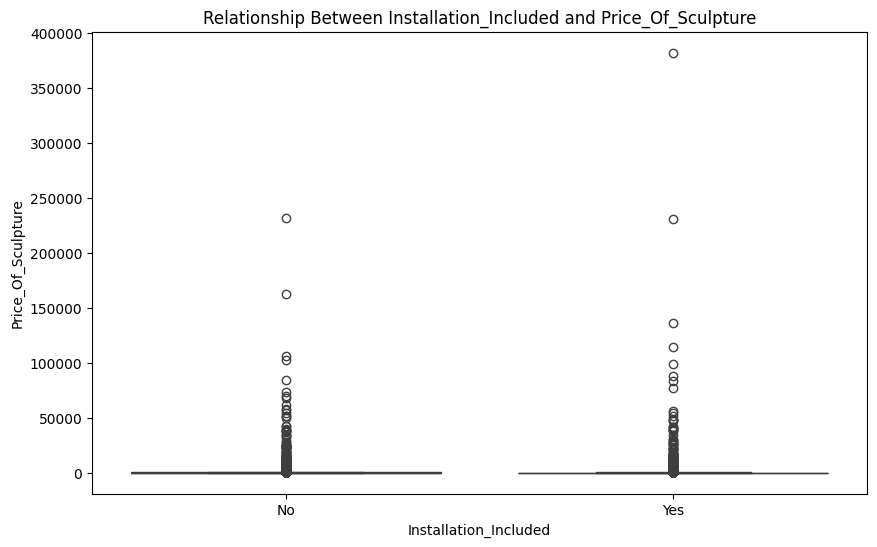

In [235]:


plot_categorical_numerical_relationship(df, categorical_column='Installation_Included', numerical_column='Price_Of_Sculpture')

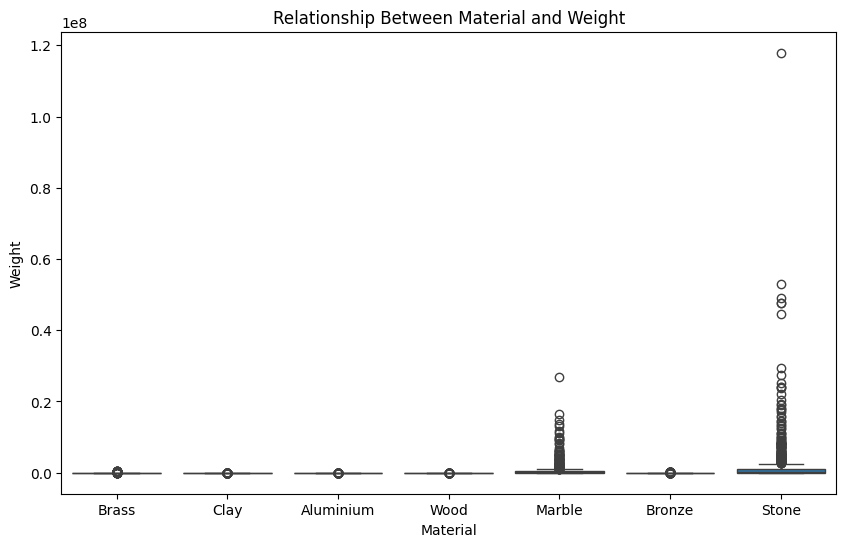

In [236]:
plot_categorical_numerical_relationship(df, categorical_column='Material', numerical_column='Weight')

- Marble and Stone 

        Being mostly of heavy scultupres due to which base shipping price can be seen with highest 

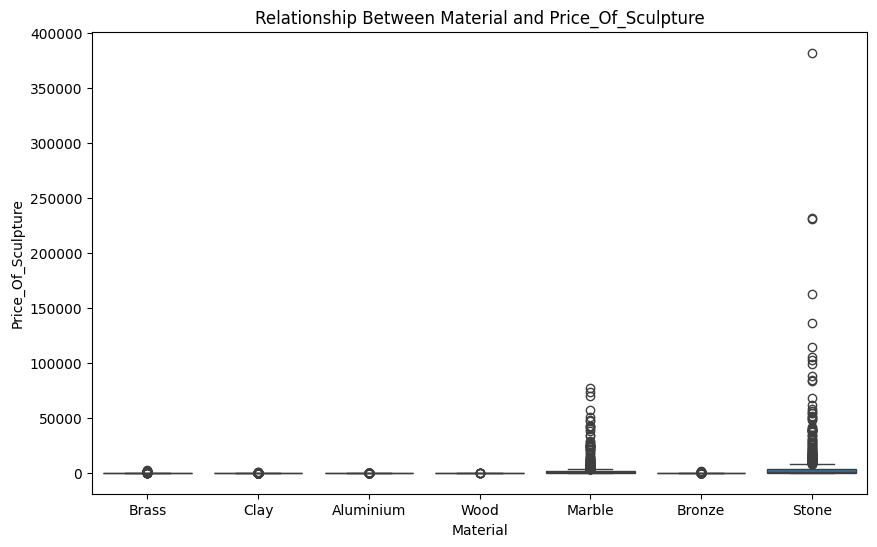

In [237]:
plot_categorical_numerical_relationship(df, categorical_column='Material', numerical_column='Price_Of_Sculpture')

- **Sculptures in Stone:** Command higher prices.
- **Followed by Marble Materials.**


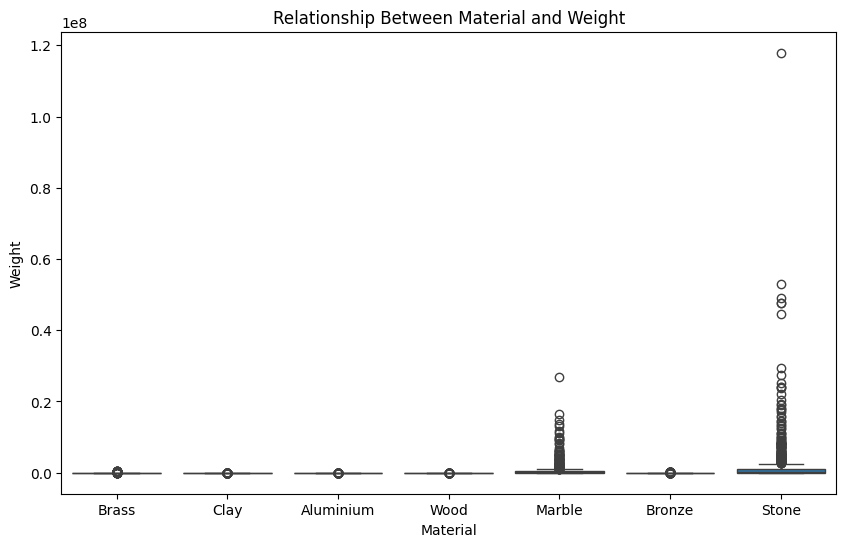

In [238]:
plot_categorical_numerical_relationship(df, categorical_column='Material', numerical_column='Weight')

The high prices of marble and stone can be attributed to the heavier sculptures made from these materials.

In [239]:
# Drop rows with NaN values in the specified column
# Print the shape of the DataFrame before dropping rows with NaN values
print(f"Shape before dropping NaN values: {df.shape}")

# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

# Print the shape of the DataFrame after dropping rows with NaN values
print(f"Shape after dropping NaN values: {df.shape}")

# Display the DataFrame after dropping rows with NaN values
print("\nDataFrame after dropping NaN values:")



Shape before dropping NaN values: (5736, 18)
Shape after dropping NaN values: (5736, 18)

DataFrame after dropping NaN values:


#### Artist Reputation

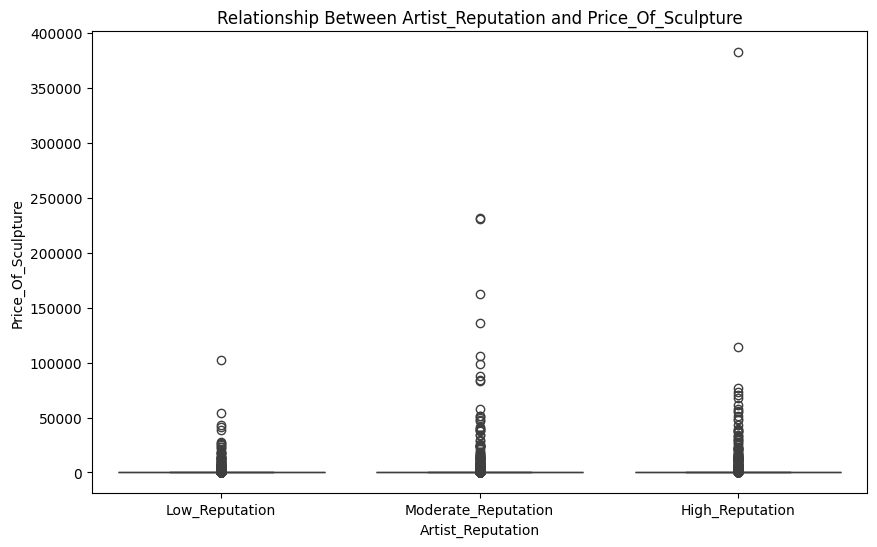

In [240]:
plot_categorical_numerical_relationship(df, categorical_column='Artist_Reputation', numerical_column='Price_Of_Sculpture')

Dropping Date Columns

In [241]:
df=df.drop(columns=['Scheduled_Date', 'Delivery_Date'])

Customer Location 

In [242]:
df['Customer_Location'].head(50)

0          New Michelle, OH 50777
1       New Michaelport, WY 12072
2           Bowmanshire, WA 19241
3            East Robyn, KY 86375
4             Aprilside, PA 52793
5            Maddenberg, AL 43096
6         South Matthew, WV 76033
7            Davidmouth, CA 37824
8             Lisaville, ND 43925
9             Jacobland, WV 85997
10         Brittanyside, GA 80351
11      Jacquelinemouth, WA 65740
12            Reidshire, DC 83551
13     West Shannonside, WA 15898
14       Kruegerchester, TX 85901
15           East Julia, CO 36716
16          Jimenezfurt, WY 87107
17                   APO AE 89114
18          North Sarah, OR 85972
19                   DPO AE 79107
21       East Stephanie, WY 49027
22                   FPO AE 03279
23           Dudleyview, NM 25088
24      North Elizabeth, AR 06294
26     West Raymondfurt, VT 08481
27     Lake Bradleyside, IA 95560
29            Olsonport, CO 96580
30     West Dakotaburgh, NH 74823
31         Savannahland, SC 44156
32            

In [243]:
def extract_state_from_column(df, column_label):
    """
    Extract the state abbreviation from a specified column in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - column_label: str
        The label of the column containing the data.

    Returns:
    - Series
        A Series containing the extracted state abbreviations.
    """
    # Check if the specified column label is present in the DataFrame
    if column_label not in df.columns:
        raise ValueError(f"Column '{column_label}' not found in the DataFrame.")

    # Use a regular expression to extract the state abbreviation
    state_pattern = r'([A-Za-z]{2})\s?\d{5}'
    extracted_states = df[column_label].str.extract(state_pattern, expand=False)

    return extracted_states

df['State'] = extract_state_from_column(df, column_label='Customer_Location')

In [244]:
df['State'].unique()

array(['OH', 'WY', 'WA', 'KY', 'PA', 'AL', 'WV', 'CA', 'ND', 'GA', 'DC',
       'TX', 'CO', 'AE', 'OR', 'NM', 'AR', 'VT', 'IA', 'NH', 'SC', 'AA',
       'OK', 'AP', 'HI', 'RI', 'LA', 'DE', 'ID', 'CT', 'FL', 'VA', 'MA',
       'KS', 'ME', 'NC', 'NV', 'MD', 'SD', 'WI', 'MN', 'MT', 'MS', 'IL',
       'AZ', 'AK', 'NY', 'NJ', 'TN', 'MI', 'NE', 'IN', 'UT', 'MO'],
      dtype=object)

Columns with Percentage of Missing Values:
Transport: 19.84%
Remote_Location: 11.09%


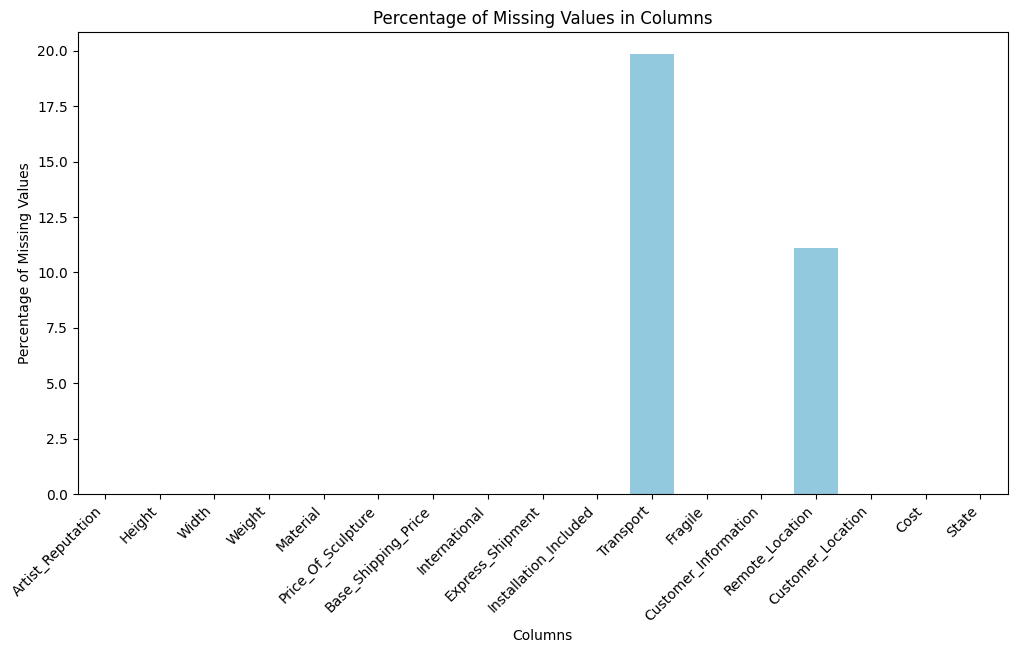

In [245]:
plot_missing_values(df=df)

In [246]:
def create_state_mode_mapping(df, state_column, target_column):
    """
    Create a dictionary for each state based on the mode of the specified target column.

    Parameters:
    - df: pandas DataFrame
    - state_column: str, the label of the state column
    - target_column: str, the label of the target column for which to create the mapping

    Returns:
    - dict, a mapping dictionary for each state based on the mode of the target column
    """
    state_mode_mapping = {}
    
    for state in df[state_column].unique():
        state_df = df[df[state_column] == state]
        
        # Drop NaN values before calculating the mode
        mode_value = state_df[target_column].dropna().mode().iat[0] if not state_df[target_column].dropna().empty else None
        state_mode_mapping[state] = mode_value

    return state_mode_mapping

def fill_nan_with_state_mode(df, state_column, target_column):
    """
    Fill NaN values in the target column based on the mode of the corresponding state.

    Parameters:
    - df: pandas DataFrame
    - state_column: str, the label of the state column
    - target_column: str, the label of the target column with NaN values to be filled

    Returns:
    - pandas DataFrame, with NaN values filled in the target column
    """
    # Create the state mode mapping
    state_mode_mapping = create_state_mode_mapping(df, state_column, target_column)
    
    # Iterate over NaN values in the target column and fill them based on the state mode mapping
    for index, row in df[df[target_column].isna()].iterrows():
        state = row[state_column]
        if state in state_mode_mapping and pd.notna(state_mode_mapping[state]):
            df.at[index, target_column] = state_mode_mapping[state]

    return df

df=fill_nan_with_state_mode(df, state_column='State', target_column='Remote_Location')

Columns with Percentage of Missing Values:
Transport: 19.84%


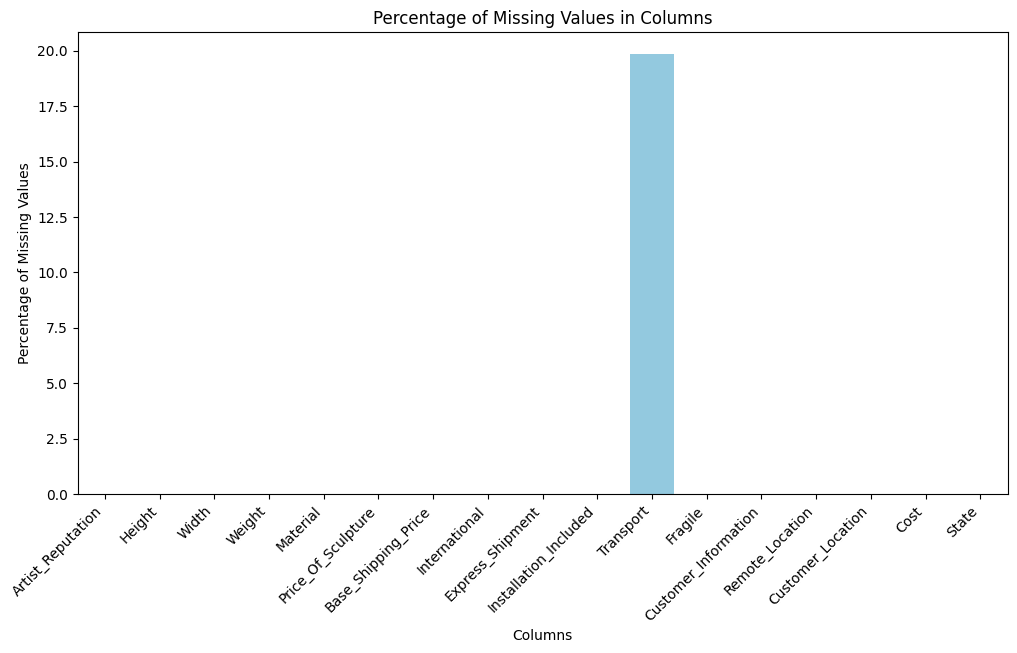

In [247]:
plot_missing_values(df=df)

In [248]:
def replace_state_abbreviations(df, state_column):
    """
    Replace state abbreviations with their corresponding state labels in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - state_column: str
        The label of the column containing state abbreviations.

    Returns:
    - DataFrame
        The DataFrame with state abbreviations replaced by state labels.
    """
    # Mapping dictionary for state abbreviations to state labels
    state_mapping = {
        'OH': 'Ohio', 'WY': 'Wyoming', 'WA': 'Washington', 'KY': 'Kentucky', 'PA': 'Pennsylvania',
        'AL': 'Alabama', 'WV': 'West Virginia', 'CA': 'California', 'ND': 'North Dakota', 'GA': 'Georgia',
        'DC': 'District of Columbia', 'TX': 'Texas', 'CO': 'Colorado', 'OR': 'Oregon', 'NM': 'New Mexico',
        'AR': 'Arkansas', 'VT': 'Vermont', 'IA': 'Iowa', 'NH': 'New Hampshire', 'SC': 'South Carolina',
        'OK': 'Oklahoma', 'HI': 'Hawaii', 'RI': 'Rhode Island', 'LA': 'Louisiana', 'DE': 'Delaware',
        'ID': 'Idaho', 'CT': 'Connecticut', 'FL': 'Florida', 'VA': 'Virginia', 'MA': 'Massachusetts',
        'KS': 'Kansas', 'ME': 'Maine', 'NC': 'North Carolina', 'NV': 'Nevada', 'MD': 'Maryland',
        'SD': 'South Dakota', 'WI': 'Wisconsin', 'MN': 'Minnesota', 'MT': 'Montana', 'MS': 'Mississippi',
        'IL': 'Illinois', 'AZ': 'Arizona', 'AK': 'Alaska', 'NY': 'New York', 'NJ': 'New Jersey',
        'TN': 'Tennessee', 'MI': 'Michigan', 'NE': 'Nebraska', 'MO': 'Missouri', 'UT': 'Utah', 'IN': 'Indiana',

    }

    # Replace state abbreviations with state labels
    df[state_column] = df[state_column].replace(state_mapping)

    return df

df = replace_state_abbreviations(df, state_column='State')

In [249]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

def plot_states_with_percentage(df, state_column):
    """
    Plot states on a map using Folium, with marker size based on percentage.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - state_column: str
        The label of the column containing state names.

    Returns:
    - Map
        Folium Map object.
    """
    # Create a Folium map centered on the United States
    map_center = [37.7749, -122.4194]  # Default center (San Francisco)
    my_map = folium.Map(location=map_center, zoom_start=4)

    # Group by state and calculate percentage
    state_percentage = df[state_column].value_counts(normalize=True).reset_index()
    state_percentage.columns = ['State', 'Percentage']

    # Dictionary to map state names to coordinates
    state_coordinates = {
        'Ohio': [40.4173, -82.9071],
        'Wyoming': [43.07597, -107.29028],
        'Washington': [47.7511, -120.7401],
        'Kentucky': [37.8393, -84.2700],
        'Pennsylvania': [41.2033, -77.1945],
        'Alabama': [32.806671, -86.791130],
        'West Virginia': [38.4680, -80.9696],
        'California': [36.7783, -119.4179],
        'North Dakota': [47.5515, -101.0020],
        'Georgia': [32.9866, -83.6487],
        'District of Columbia': [38.8951, -77.0369],
        'Texas': [31.9686, -99.9018],
        'Colorado': [39.5501, -105.7821],
        'Oregon': [43.8041, -120.5542],
        'New Mexico': [34.4071, -106.1126],
        'Arkansas': [34.7465, -92.2896],
        'Vermont': [44.0682, -72.6657],
        'Iowa': [41.8780, -93.0977],
        'New Hampshire': [43.1939, -71.5724],
        'South Carolina': [33.8361, -81.1637],
        'Oklahoma': [35.0078, -97.0929],
        'Hawaii': [20.7961, -156.3319],
        'Rhode Island': [41.5801, -71.4774],
        'Louisiana': [30.9843, -91.9623],
        'Delaware': [38.9108, -75.5277],
        'Idaho': [44.0682, -114.7420],
        'Connecticut': [41.6032, -73.0877],
        'Florida': [27.9944, -81.7603],
        'Virginia': [37.4316, -78.6569],
        'Massachusetts': [42.4072, -71.3824],
        'Kansas': [39.0119, -98.4842],
        'Maine': [45.2538, -69.4455],
        'North Carolina': [35.7596, -79.0193],
        'Nevada': [39.5501, -116.6316],
        'Maryland': [39.0458, -76.6413],
        'South Dakota': [43.9695, -99.9018],
        'Wisconsin': [43.7844, -88.7879],
        'Minnesota': [46.7296, -94.6859],
        'Montana': [46.8797, -110.3626],
        'Mississippi': [32.3547, -89.3985],
        'Illinois': [40.6331, -89.3985],
        'Arizona': [33.7298, -111.4312],
        'Alaska': [61.0160, -149.0807],
        'New York': [40.7128, -74.0060],
        'New Jersey': [40.0583, -74.4057],
        'Tennessee': [35.5175, -86.5804],
        'Michigan': [44.3148, -85.6024],
        'Nebraska': [41.4925, -99.9018],
        'Missouri': [38.5739, -92.6032],
        'Utah': [39.3210, -111.0937],
        'Indiana': [40.5512, -85.6024],
        # Add more states as needed
    }

    state_data = pd.DataFrame(state_coordinates.items(), columns=['State', 'Coordinates'])
    state_data = state_data.merge(state_percentage, on='State', how='left')

    # Create a MarkerCluster to handle marker clustering
    marker_cluster = MarkerCluster().add_to(my_map)

    # Plot markers for each state with marker size based on percentage
    for index, row in state_data.iterrows():
        state_name = row['State']
        coordinates = row['Coordinates']
        percentage = row['Percentage'] * 100 if not pd.isnull(row['Percentage']) else 0

        # Adjust marker size based on percentage
        marker_size = int(percentage) + 1

        folium.CircleMarker(
            location=coordinates,
            radius=marker_size,
            popup=f"{state_name}: {percentage:.2f}% occurrences",
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(marker_cluster)

    return my_map


my_map_with_percentage = plot_states_with_percentage(df, state_column='State')

# Display the map
my_map_with_percentage

#### Remote Location

In [250]:
numerical_labels,categorical_labels=split_numerical_categorical_labels(df=df)

Columns with Percentage of Missing Values:
Transport: 19.84%


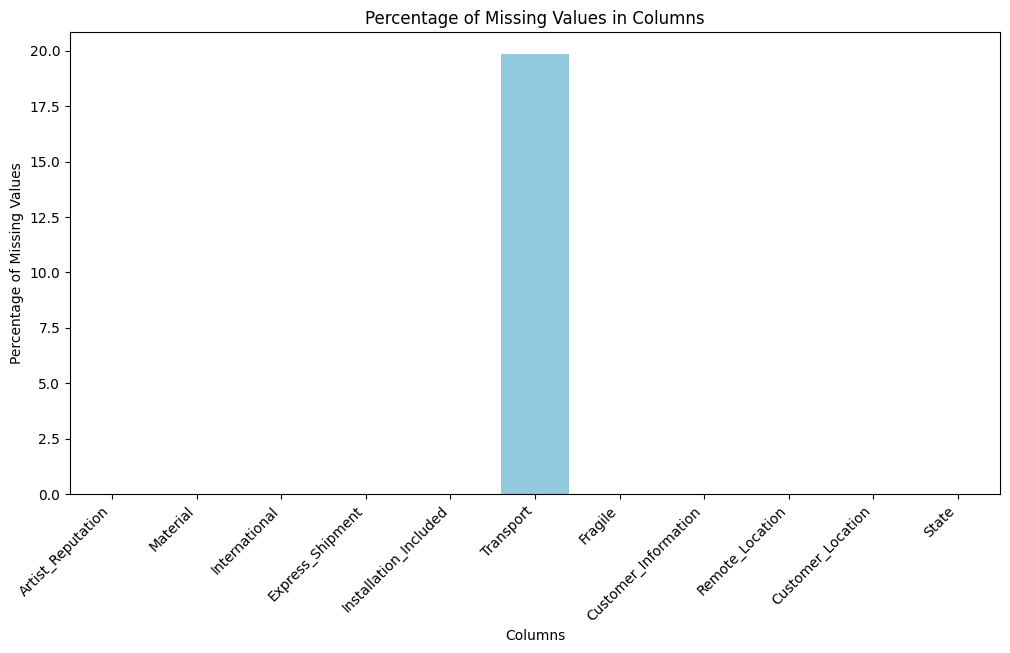

In [251]:
plot_missing_values(df=df[categorical_labels])

In [252]:
# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Remote_Location"])

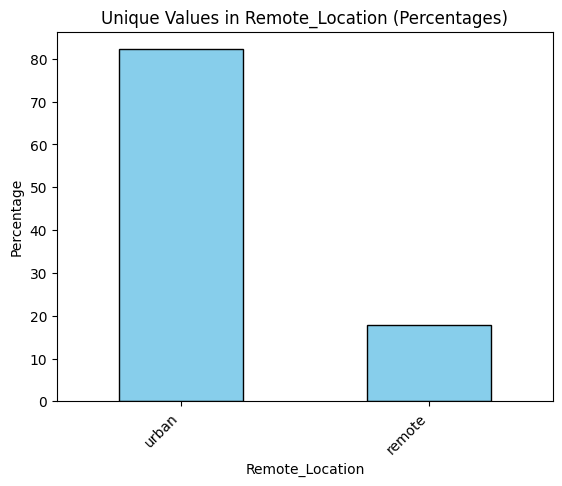

In [253]:
df['Remote_Location'] = df['Remote_Location'].replace({'Yes': 'remote', 'No': 'urban'})

plot_categorical_unique_values(df=df,column_label='Remote_Location')

- Most of the Location product shipped to urban locations

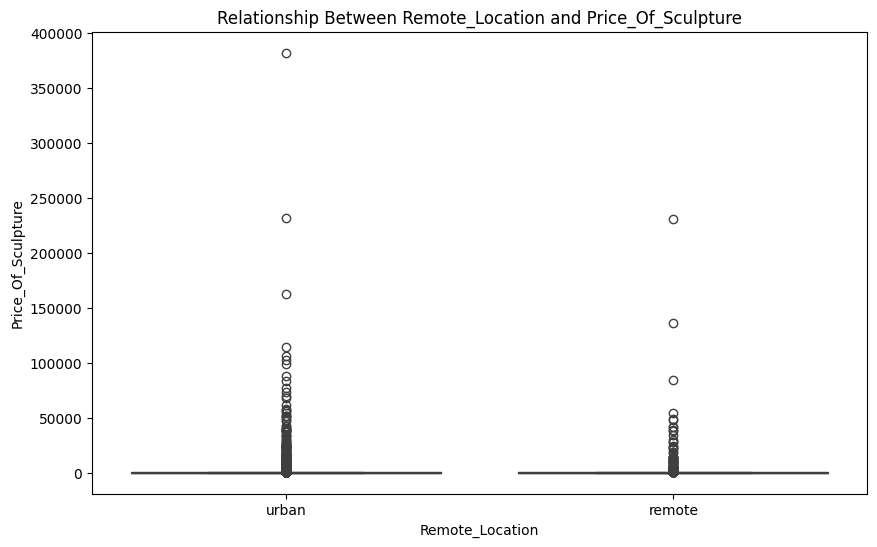

In [254]:
plot_categorical_numerical_relationship(df=df,categorical_column='Remote_Location',numerical_column='Price_Of_Sculpture')

Price of the sculture products shipped to remote location are generally lower than the urban location

Transport 

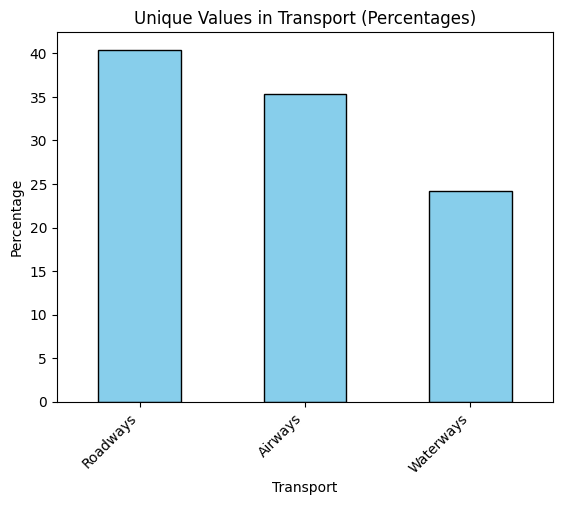

In [255]:
def plot_categorical_unique_values(df, column_label):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column
    value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    
plot_categorical_unique_values(df=df, column_label="Transport")

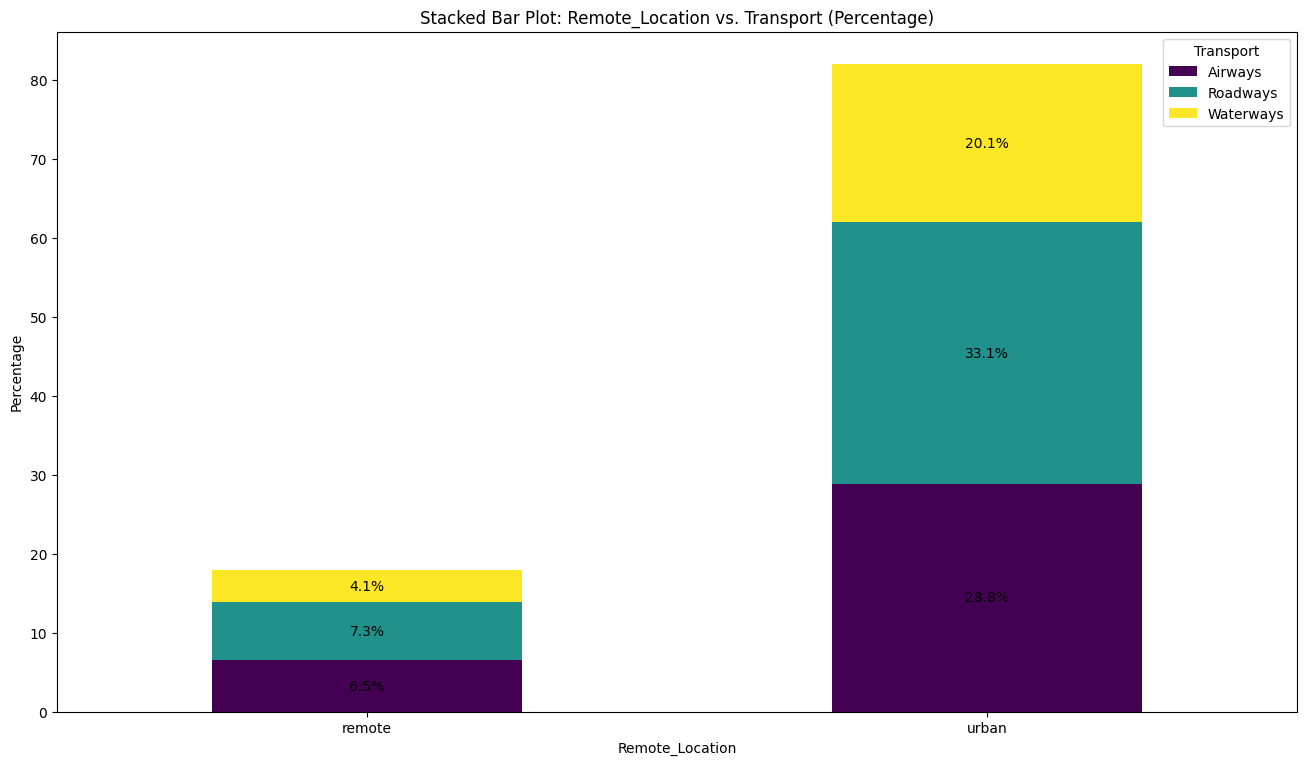

In [256]:
stacked_bar_plot(df, column1='Remote_Location', column2='Transport', normalize=True, cmap='viridis', show_percentages=True)


- Urban locations primarily utilize roadways for shipping, followed by airways and waterways.
- A lower percentage of shipments is directed towards remote areas.

As product orders are predominantly from the eastern part(urban area) of the USA, road shipment is generally preferred. However, in significant cases, airways are observed in urban locations.


In [257]:
# Create a dictionary with states as keys and corresponding transport as values
state_transport_dict = {}

for state, transport in zip(df['State'], df['Transport']):
    if state not in state_transport_dict:
        state_transport_dict[state] = [transport]
    else:
        state_transport_dict[state].append(transport)

print("State-Transport Dictionary:")
print(state_transport_dict)

State-Transport Dictionary:
{'Ohio': ['Airways', 'Airways', 'Roadways', 'Roadways', 'Airways', 'Airways', 'Roadways', 'Waterways', 'Roadways', 'Airways', 'Roadways', 'Roadways', nan, nan, 'Waterways', nan, 'Waterways', 'Waterways', 'Roadways', nan, 'Airways', 'Airways', 'Airways', 'Roadways', 'Airways', nan, 'Roadways', 'Airways', 'Airways', 'Roadways', 'Airways', 'Roadways', 'Airways', nan, 'Roadways', 'Airways', 'Airways', 'Roadways', 'Roadways', 'Airways', 'Waterways', 'Airways', nan, 'Airways', 'Waterways', 'Roadways', nan, nan, 'Roadways', 'Airways', 'Waterways', 'Airways', 'Waterways', nan, 'Waterways', 'Airways', 'Waterways', 'Roadways', 'Waterways', nan, 'Roadways', 'Airways', 'Roadways', nan, 'Waterways', 'Roadways', 'Airways', 'Waterways', 'Waterways', 'Roadways', 'Airways', nan, 'Airways', 'Airways', 'Waterways', nan, nan, 'Airways', 'Waterways', 'Roadways', nan, 'Waterways', nan, 'Roadways'], 'Wyoming': ['Roadways', 'Waterways', 'Waterways', 'Airways', 'Airways', nan, 'Airw

In [258]:
# Create a dictionary with states as keys and the most frequent transport as values
state_most_frequent_transport_dict = {}

for state, transports in state_transport_dict.items():
    most_frequent_transport = max(set(transports), key=transports.count)
    state_most_frequent_transport_dict[state] = most_frequent_transport

print("State-Most Frequent Transport Dictionary:")
print(state_most_frequent_transport_dict)

State-Most Frequent Transport Dictionary:
{'Ohio': 'Airways', 'Wyoming': 'Airways', 'Washington': 'Roadways', 'Kentucky': 'Roadways', 'Pennsylvania': 'Roadways', 'Alabama': 'Roadways', 'West Virginia': 'Roadways', 'California': 'Airways', 'North Dakota': 'Roadways', 'Georgia': 'Roadways', 'District of Columbia': 'Roadways', 'Texas': 'Roadways', 'Colorado': 'Airways', 'AE': 'Roadways', 'Oregon': 'Airways', 'New Mexico': 'Roadways', 'Arkansas': 'Airways', 'Vermont': 'Roadways', 'Iowa': 'Roadways', 'New Hampshire': 'Roadways', 'South Carolina': 'Airways', 'AA': 'Roadways', 'Oklahoma': 'Roadways', 'AP': 'Airways', 'Hawaii': 'Roadways', 'Rhode Island': 'Roadways', 'Louisiana': 'Roadways', 'Delaware': 'Roadways', 'Idaho': 'Airways', 'Connecticut': 'Airways', 'Florida': 'Roadways', 'Virginia': 'Airways', 'Massachusetts': 'Roadways', 'Kansas': 'Airways', 'Maine': 'Roadways', 'North Carolina': 'Roadways', 'Nevada': 'Roadways', 'Maryland': 'Airways', 'South Dakota': 'Roadways', 'Wisconsin': 'Roa

In [259]:

# Calculate the count of NaN values in "Transport" before the operation
before_count = df['Transport'].isna().sum()

# Fill only NaN values in the 'Transport' column based on the dictionary
df['Transport'] = df.apply(lambda row: state_most_frequent_transport_dict.get(row['State'], row['Transport']) if pd.isna(row['Transport']) else row['Transport'], axis=1)


# Calculate the count of NaN values in "Transport" after the operation
after_count = df['Transport'].isna().sum()

# Print the count of NaN values before and after the operation
print(f"NaN Count in 'Transport' before: {before_count}")
print(f"NaN Count in 'Transport' after: {after_count}")

NaN Count in 'Transport' before: 1138
NaN Count in 'Transport' after: 0


Columns with Percentage of Missing Values:


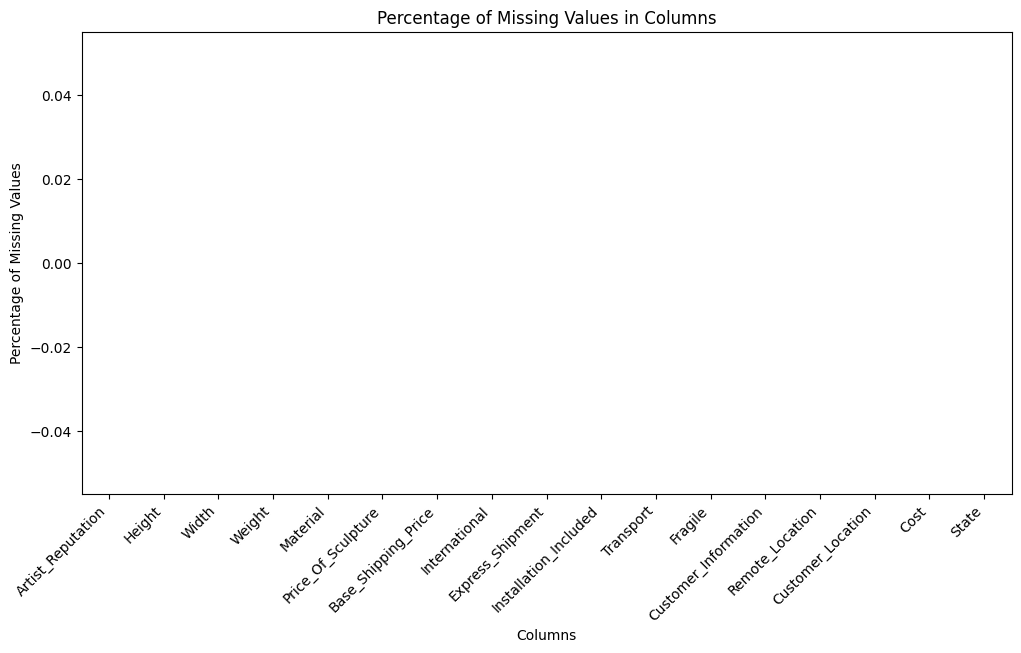

In [260]:
plot_missing_values(df=df)

In [261]:
numerical_labels, categorical_labels = split_numerical_categorical_labels(df=df)

Columns with Percentage of Missing Values:


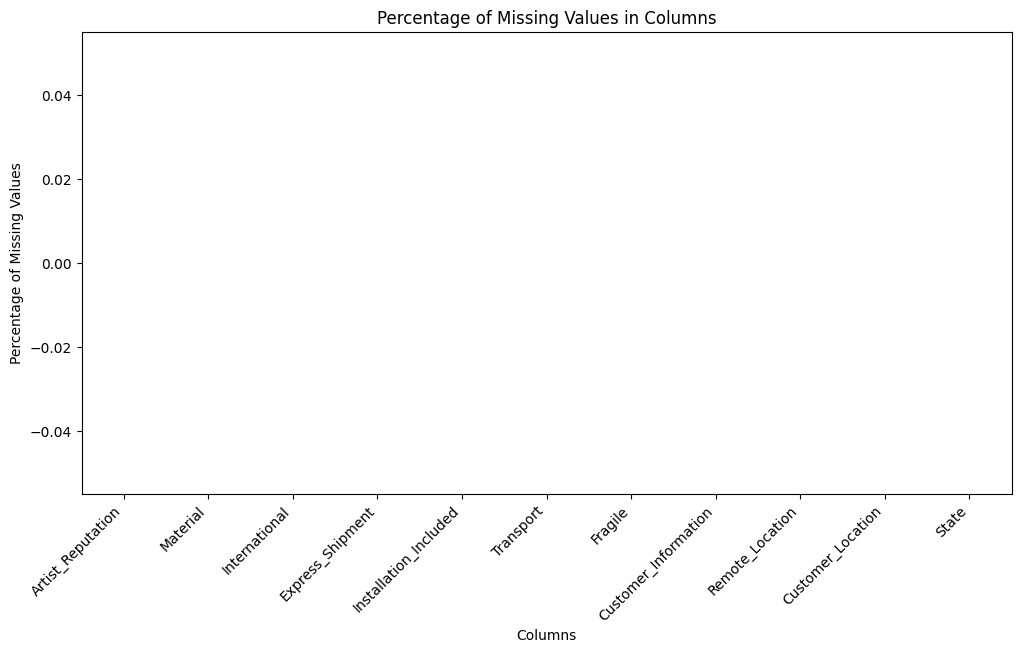

In [262]:
plot_missing_values(df=df[categorical_labels])

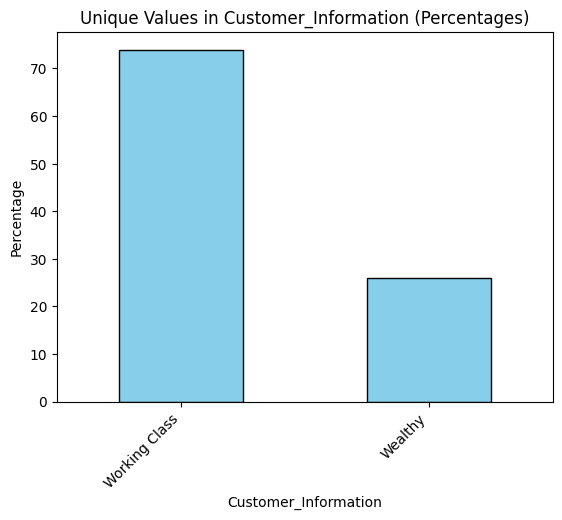

In [263]:
plot_categorical_unique_values(df=df,column_label='Customer_Information')

Customer base is dominanted by workign class ( 70 % ) 

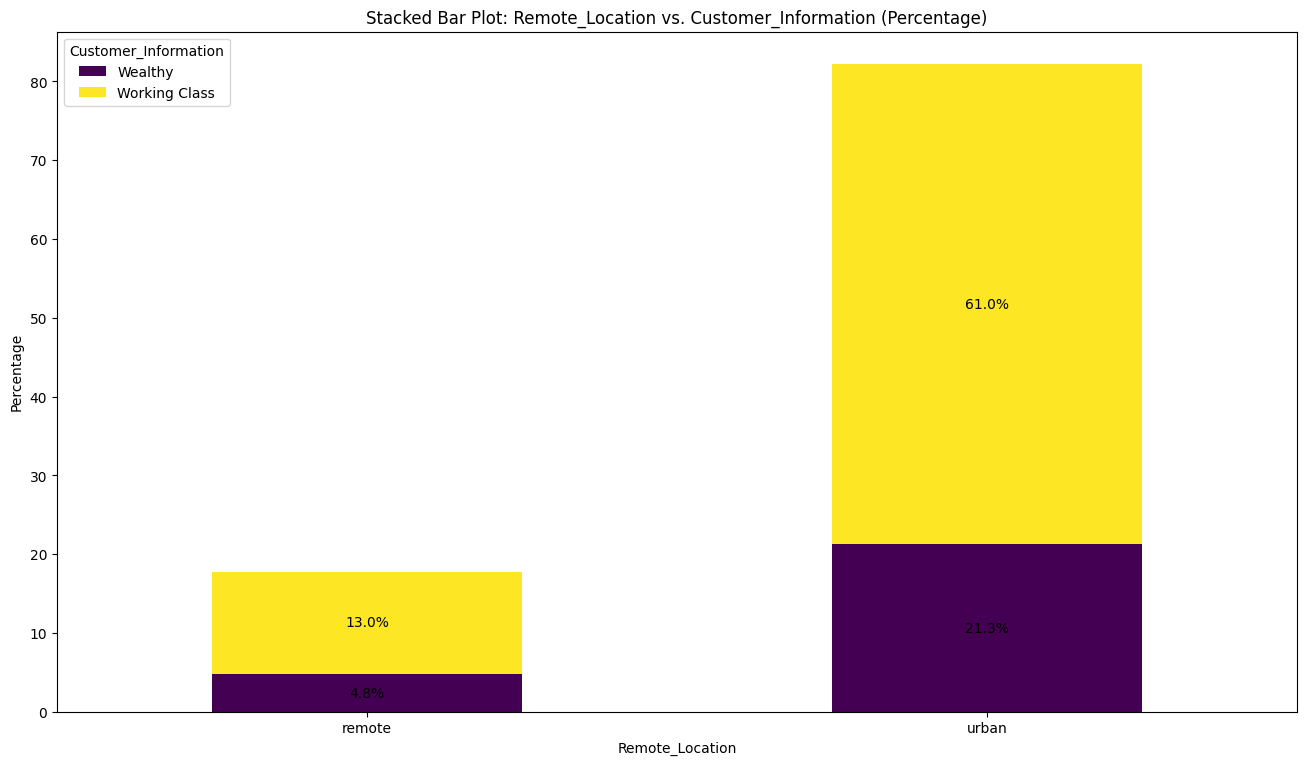

In [264]:

stacked_bar_plot(df, column1='Remote_Location', column2='Customer_Information', normalize=True, cmap='viridis', show_percentages=True)

- The working class is dominant in both urban and remote regions it is the primary purchaser in both urban and remote regions





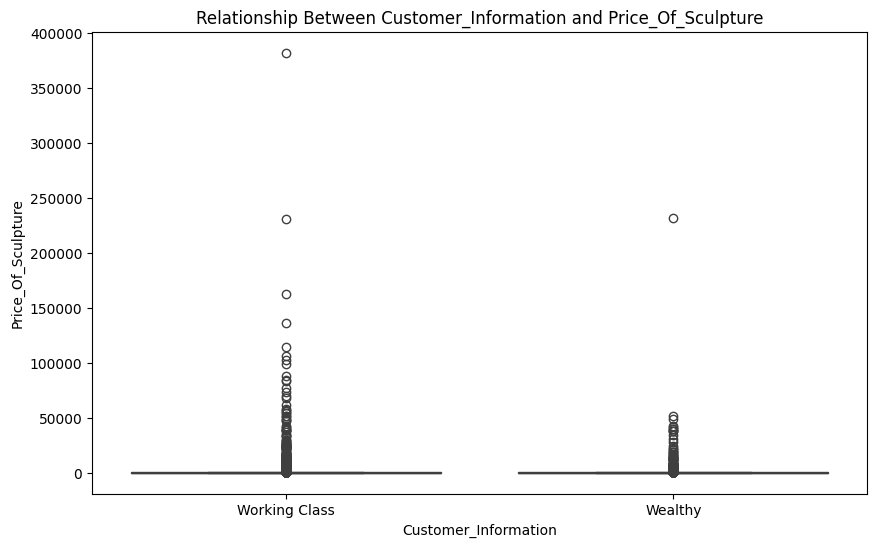

In [265]:
plot_categorical_numerical_relationship(df=df,categorical_column='Customer_Information',numerical_column='Price_Of_Sculpture')

- The working class accounts for a large number of purchases, and the amount spent on expensive art is significantly higher.
- Only a small percentage of the wealthy population has invested a substantial amount in art exhibitions.


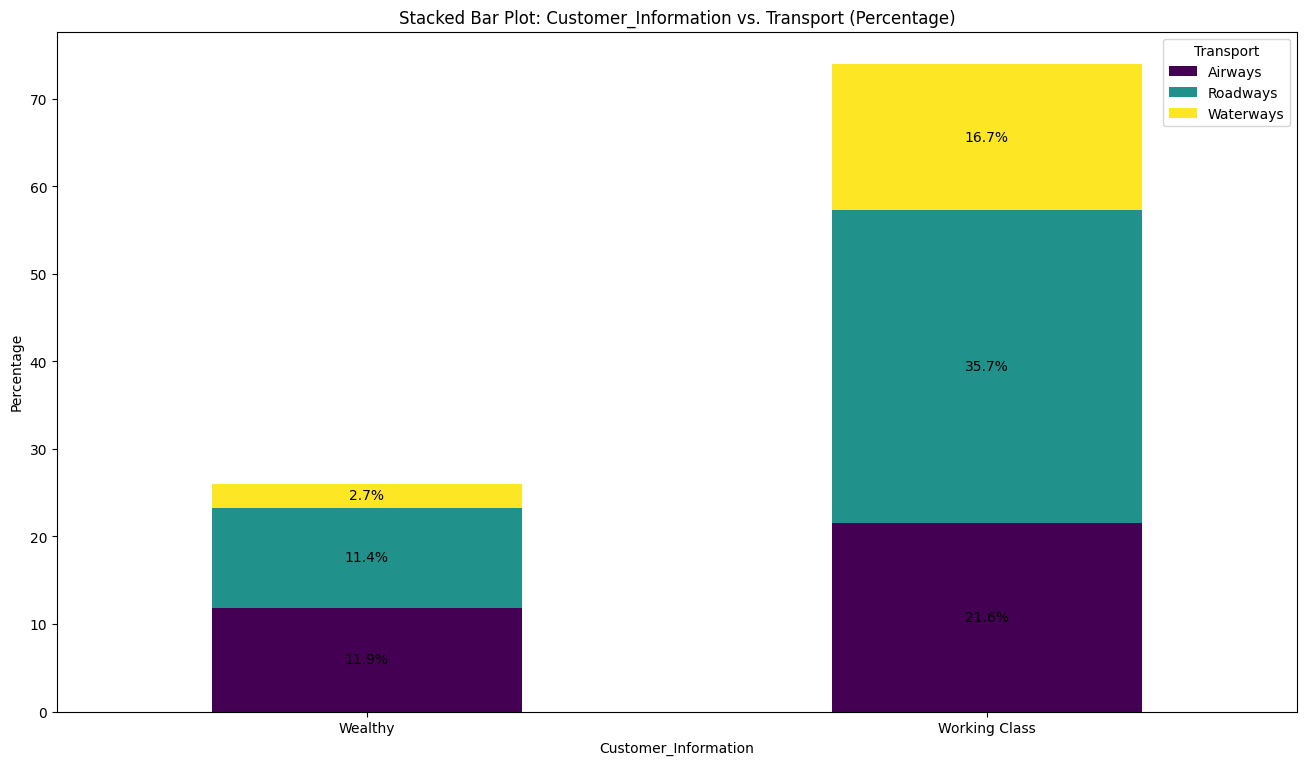

In [266]:


stacked_bar_plot(df, column1='Customer_Information', column2='Transport', normalize=True, cmap='viridis', show_percentages=True)

- **Working Class:** This demographic typically prefers shipments via roadways. However, a significant number of shipments are also conducted through airways and waterways.

- **Wealthy Class:** Shipments for this category predominantly occur through airways and then Roadways predomianntly


In general Waterway is less prefered by both the classes of populace


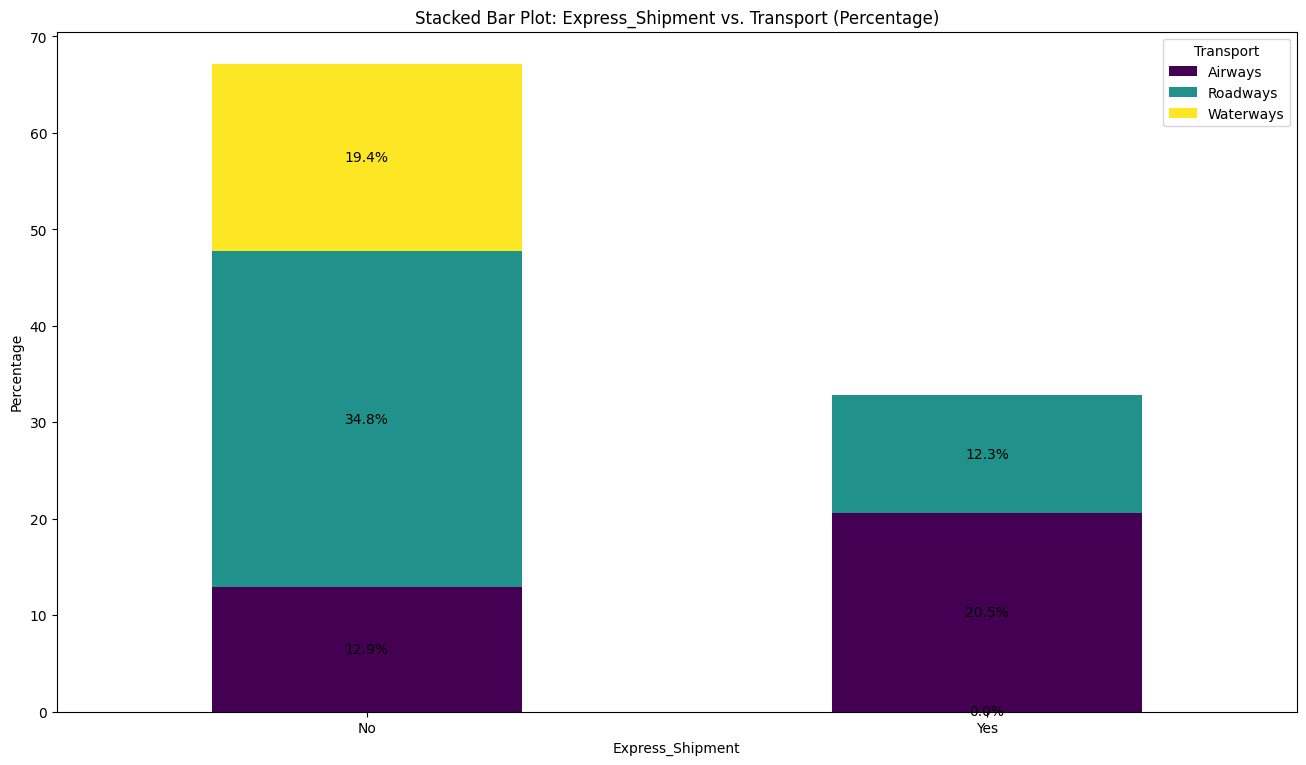

In [267]:


stacked_bar_plot(df, column1='Express_Shipment', column2='Transport', normalize=True, cmap='viridis', show_percentages=True)


- **Express Shipments:** Dominated by airways.

- **Non-Express Shipments:** Predominantly handled through roadways and waterways.


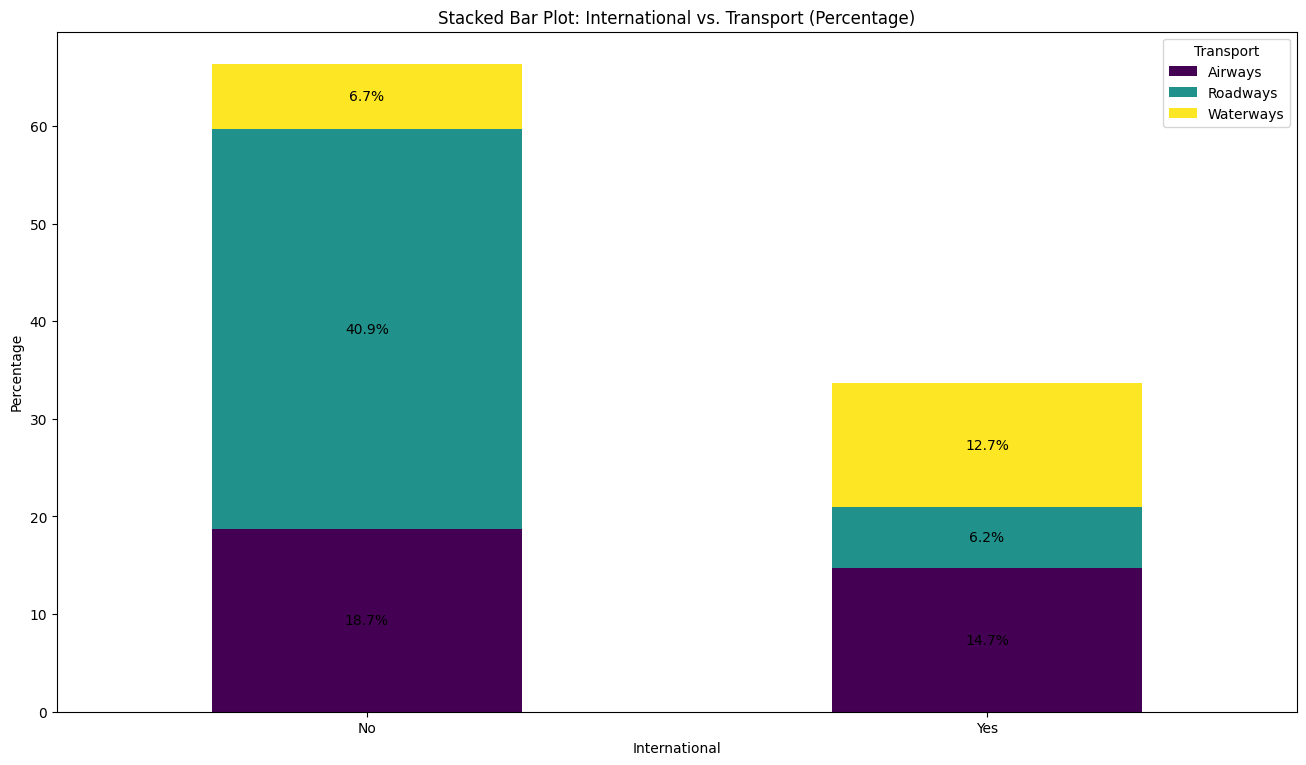

In [268]:


stacked_bar_plot(df, column1='International', column2='Transport', normalize=True, cmap='viridis', show_percentages=True)

- **International Shipments:**
  - Predominantly done through airways and waterways.

- **Domestic Shipments:**
  - Roadways dominate, followed by airways.


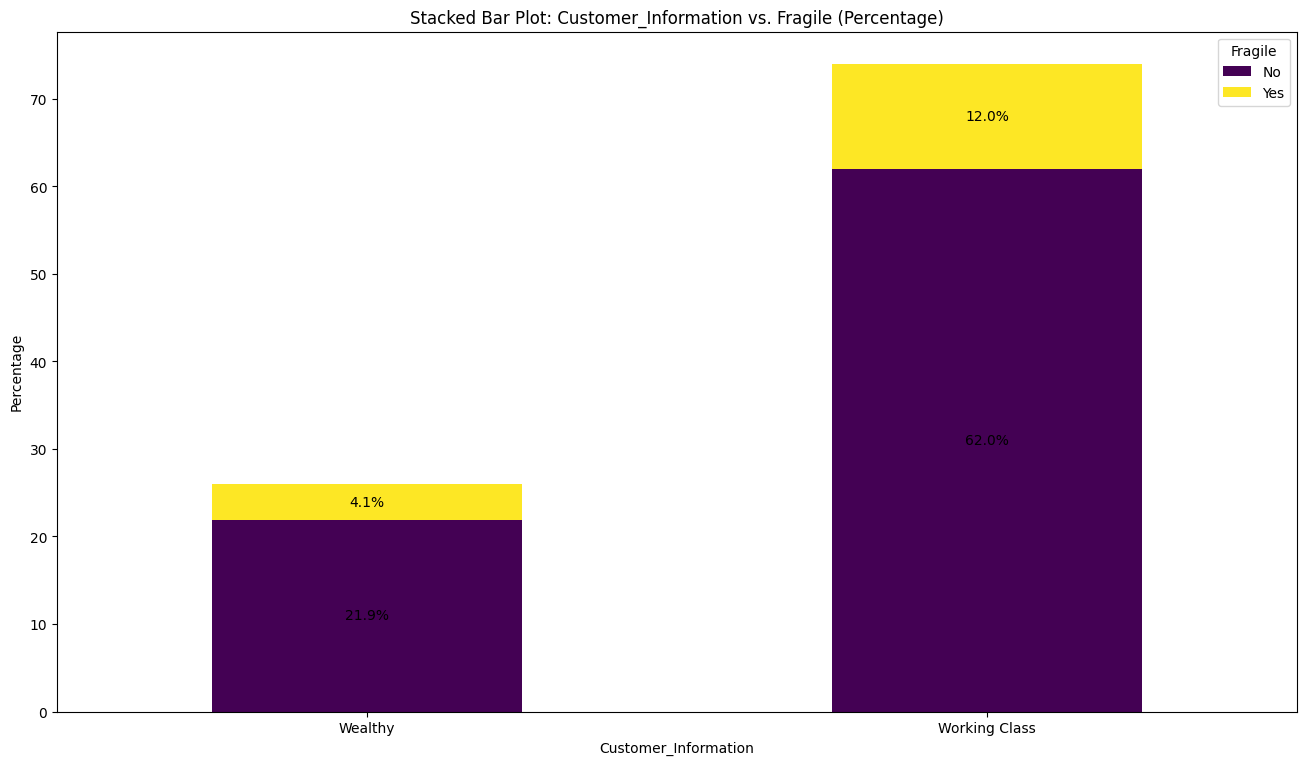

In [269]:

stacked_bar_plot(df, column1='Customer_Information', column2='Fragile', normalize=True, cmap='viridis', show_percentages=True)



Customers from Working class bought Fragile Material scultures more comparatively i.e. Marble,Clay

In [270]:
df['State'].isna().sum()

0

In [194]:
df=df.drop(columns=[,'Customer_Location'])

SyntaxError: invalid syntax (4082232114.py, line 1)

### Outlier

In [188]:
import numpy as np

In [189]:
class OutlierBoxPlotter:
    def __init__(self, df, numerical_columns):
        self.df = df
        self.numerical_columns = numerical_columns
        self.outliers = None
        self.filtered_df = None

    def plot_box_plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title)
        plt.show()

    def identify_outliers(self, quantile_percentage=0.10, threshold=1.5):
        self.outliers = pd.DataFrame()

        for column in self.numerical_columns:
            q1 = np.percentile(self.df[column], 100 * quantile_percentage / 2)
            q3 = np.percentile(self.df[column], 100 - (100 * quantile_percentage / 2))
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = (self.df[column] < lower_bound) | (self.df[column] > upper_bound)
            self.outliers[column] = column_outliers

            # Print only count of outliers removed for each column
            outliers_removed = self.df[column][column_outliers]
            outliers_removed_count = outliers_removed.count()
            print(f"Count of outliers removed from '{column}': {outliers_removed_count}\n")

    def remove_outliers(self):
        if self.outliers is not None:
            self.filtered_df = self.df[~self.outliers.any(axis=1)]
            # Print shape before and after outlier removal
            print(f"Shape before outlier removal: {self.df.shape}")
            print(f"Shape after outlier removal: {self.filtered_df.shape}")
        else:
            print("Outliers not identified. Please run identify_outliers() first.")

    def plot_before_after(self, title_before, title_after):
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title_before)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.filtered_df[self.numerical_columns])
        plt.title(title_after)

        plt.show()

    def get_filtered_dataframe(self):
        if self.filtered_df is not None:
            return self.filtered_df
        else:
            print("Filtered DataFrame is not available. Please run remove_outliers() first.")
            return None

In [190]:
numerical_labels

['Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [191]:
numerical_labels=[
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

Count of outliers removed from 'Weight': 150

Count of outliers removed from 'Price_Of_Sculpture': 158

Count of outliers removed from 'Base_Shipping_Price': 0

Count of outliers removed from 'Cost': 194

Shape before outlier removal: (5736, 15)
Shape after outlier removal: (5472, 15)


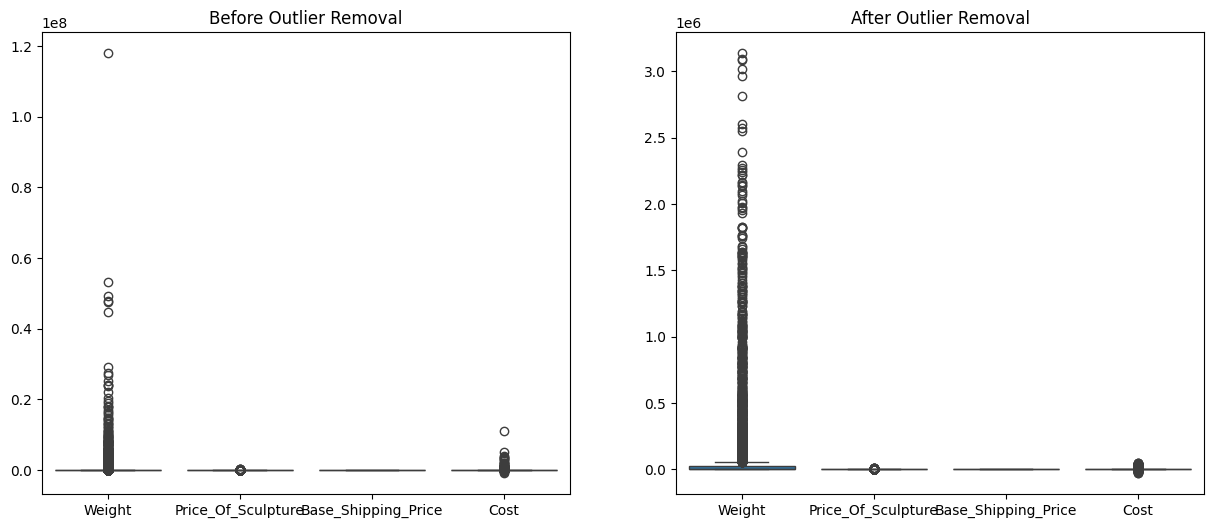

In [192]:
outlier_box_plotter = OutlierBoxPlotter(df,numerical_columns=numerical_labels)

# Identify outliers using default threshold (1.5)
outlier_box_plotter.identify_outliers()

# Remove outliers
outlier_box_plotter.remove_outliers()

# Plot both box plots side by side for comparison
outlier_box_plotter.plot_before_after("Before Outlier Removal", "After Outlier Removal")

In [193]:
df=outlier_box_plotter.get_filtered_dataframe()

In [344]:
def save_dataframe_as_csv(dataframe, folder_name, file_name='output.csv'):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    file_path = os.path.join(folder_name, file_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(file_path, index=False)

    print(f"DataFrame saved as CSV: {file_path}")

save_dataframe_as_csv(dataframe=df, folder_name="Transformed_data", file_name='EDA.csv')

DataFrame saved as CSV: Transformed_data\EDA.csv


In [345]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Cost
0,Low_Reputation,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,urban,-283.29
1,Low_Reputation,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,urban,-159.96
2,Low_Reputation,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,remote,-154.29
3,Low_Reputation,9.0,8.0,649.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,remote,-161.16
4,Low_Reputation,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,urban,-159.23


In [271]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Customer_Location', 'Cost',
       'State'],
      dtype='object')